# UnitedStates_COVID_19_dataset
Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.

# Problem Statement
The dataset is provided to identify the deaths and recovered cases. Both are contnous variable, it's a regression problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
covid_df = pd.read_csv('UScovid.csv')
covid_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
covid_df.shape

(58, 18)

In [4]:
# Counting null values
covid_df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [5]:
covid_df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [6]:
covid_df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [7]:
for i in covid_df.columns:
    print(f"Value count for the column {i} is as follows:\n{covid_df[i].value_counts()}")
    print("*"*100)

Value count for the column Province_State is as follows:
New Hampshire               1
California                  1
Alaska                      1
Georgia                     1
Wyoming                     1
Arizona                     1
Nebraska                    1
South Carolina              1
Mississippi                 1
Arkansas                    1
Grand Princess              1
Oklahoma                    1
New York                    1
Alabama                     1
Delaware                    1
Florida                     1
Vermont                     1
District of Columbia        1
Michigan                    1
Illinois                    1
Kentucky                    1
Rhode Island                1
Maine                       1
Maryland                    1
New Mexico                  1
Minnesota                   1
Iowa                        1
Connecticut                 1
Guam                        1
New Jersey                  1
North Carolina              1
Pennsylvania 

Country_Region , Last_Update have just one unique value counts so we can drop them.

In [8]:
covid_df.drop(['Country_Region','Last_Update'], axis=1, inplace=True)

In [9]:
covid_df.shape

(58, 16)

In [10]:
# Imputing the null values.
cols_2Impute=['Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
for col in cols_2Impute:
    covid_df[col].fillna(covid_df[col].mean(),inplace=True)

In [11]:
covid_df.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

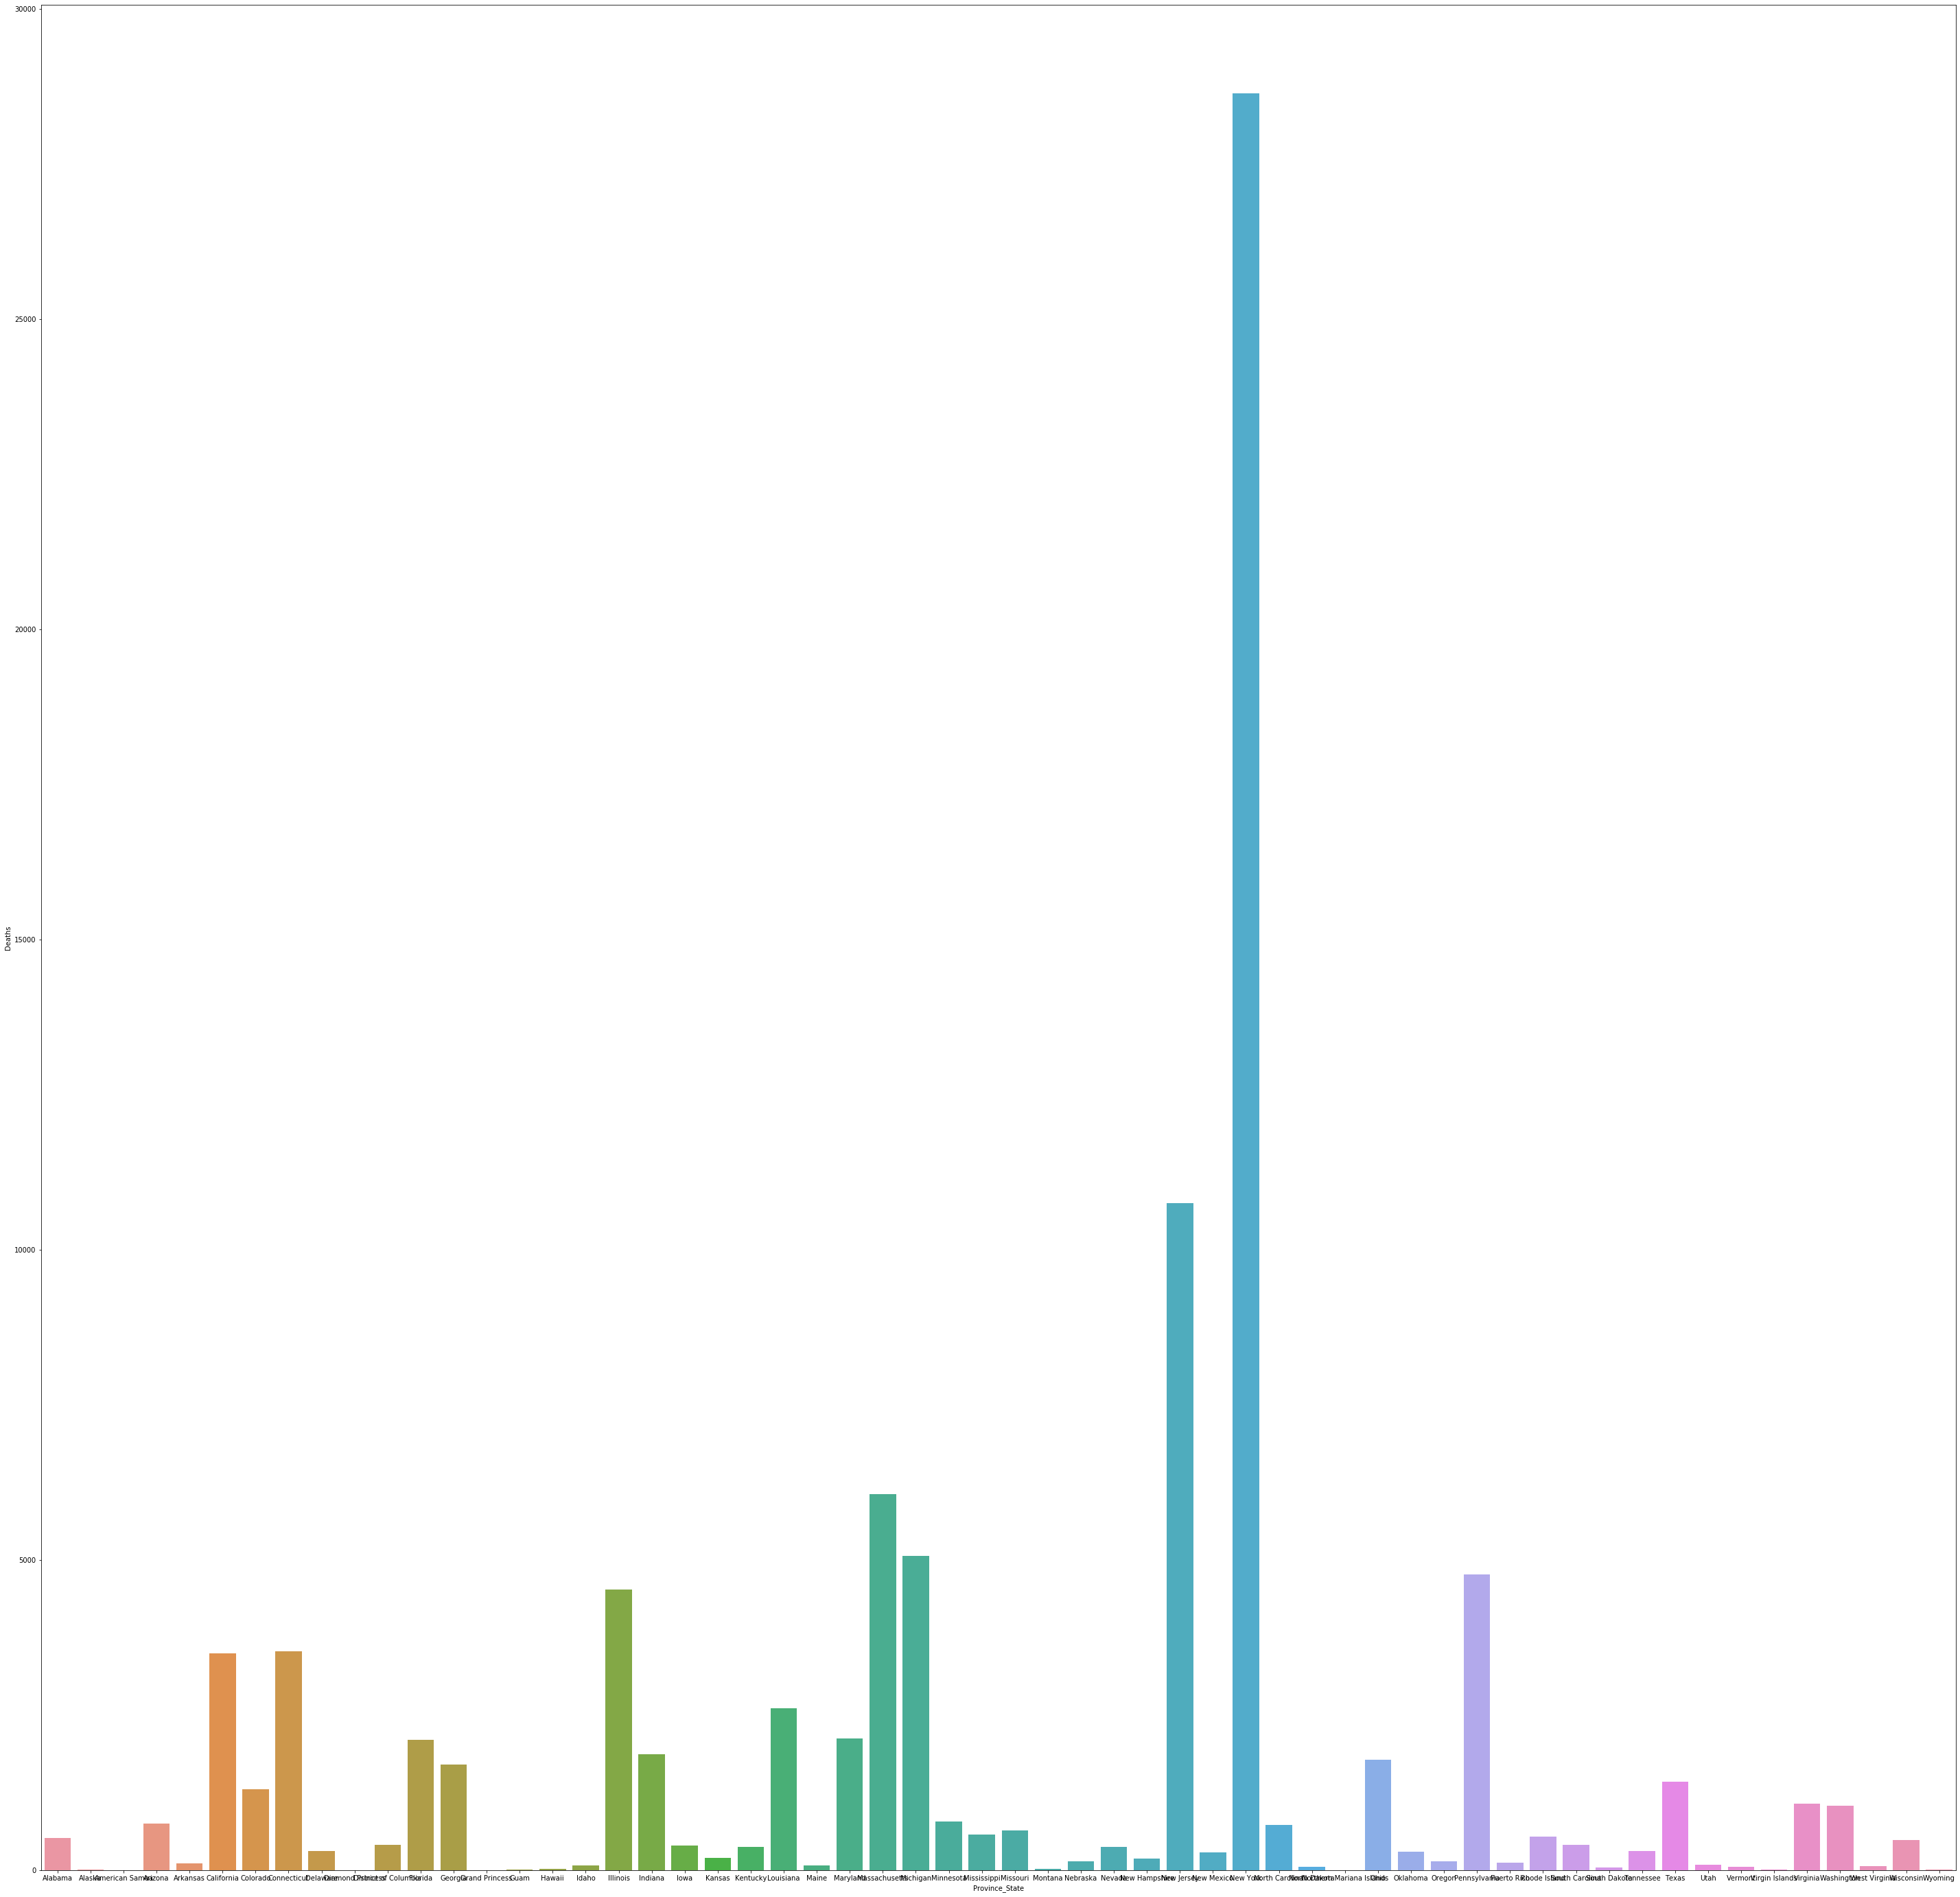

In [12]:
# Barplots
plt.figure(figsize=(50,50))
sns.barplot(x='Province_State',y='Deaths',data=covid_df)

As expected deaths are more for more densed cities/ big cities

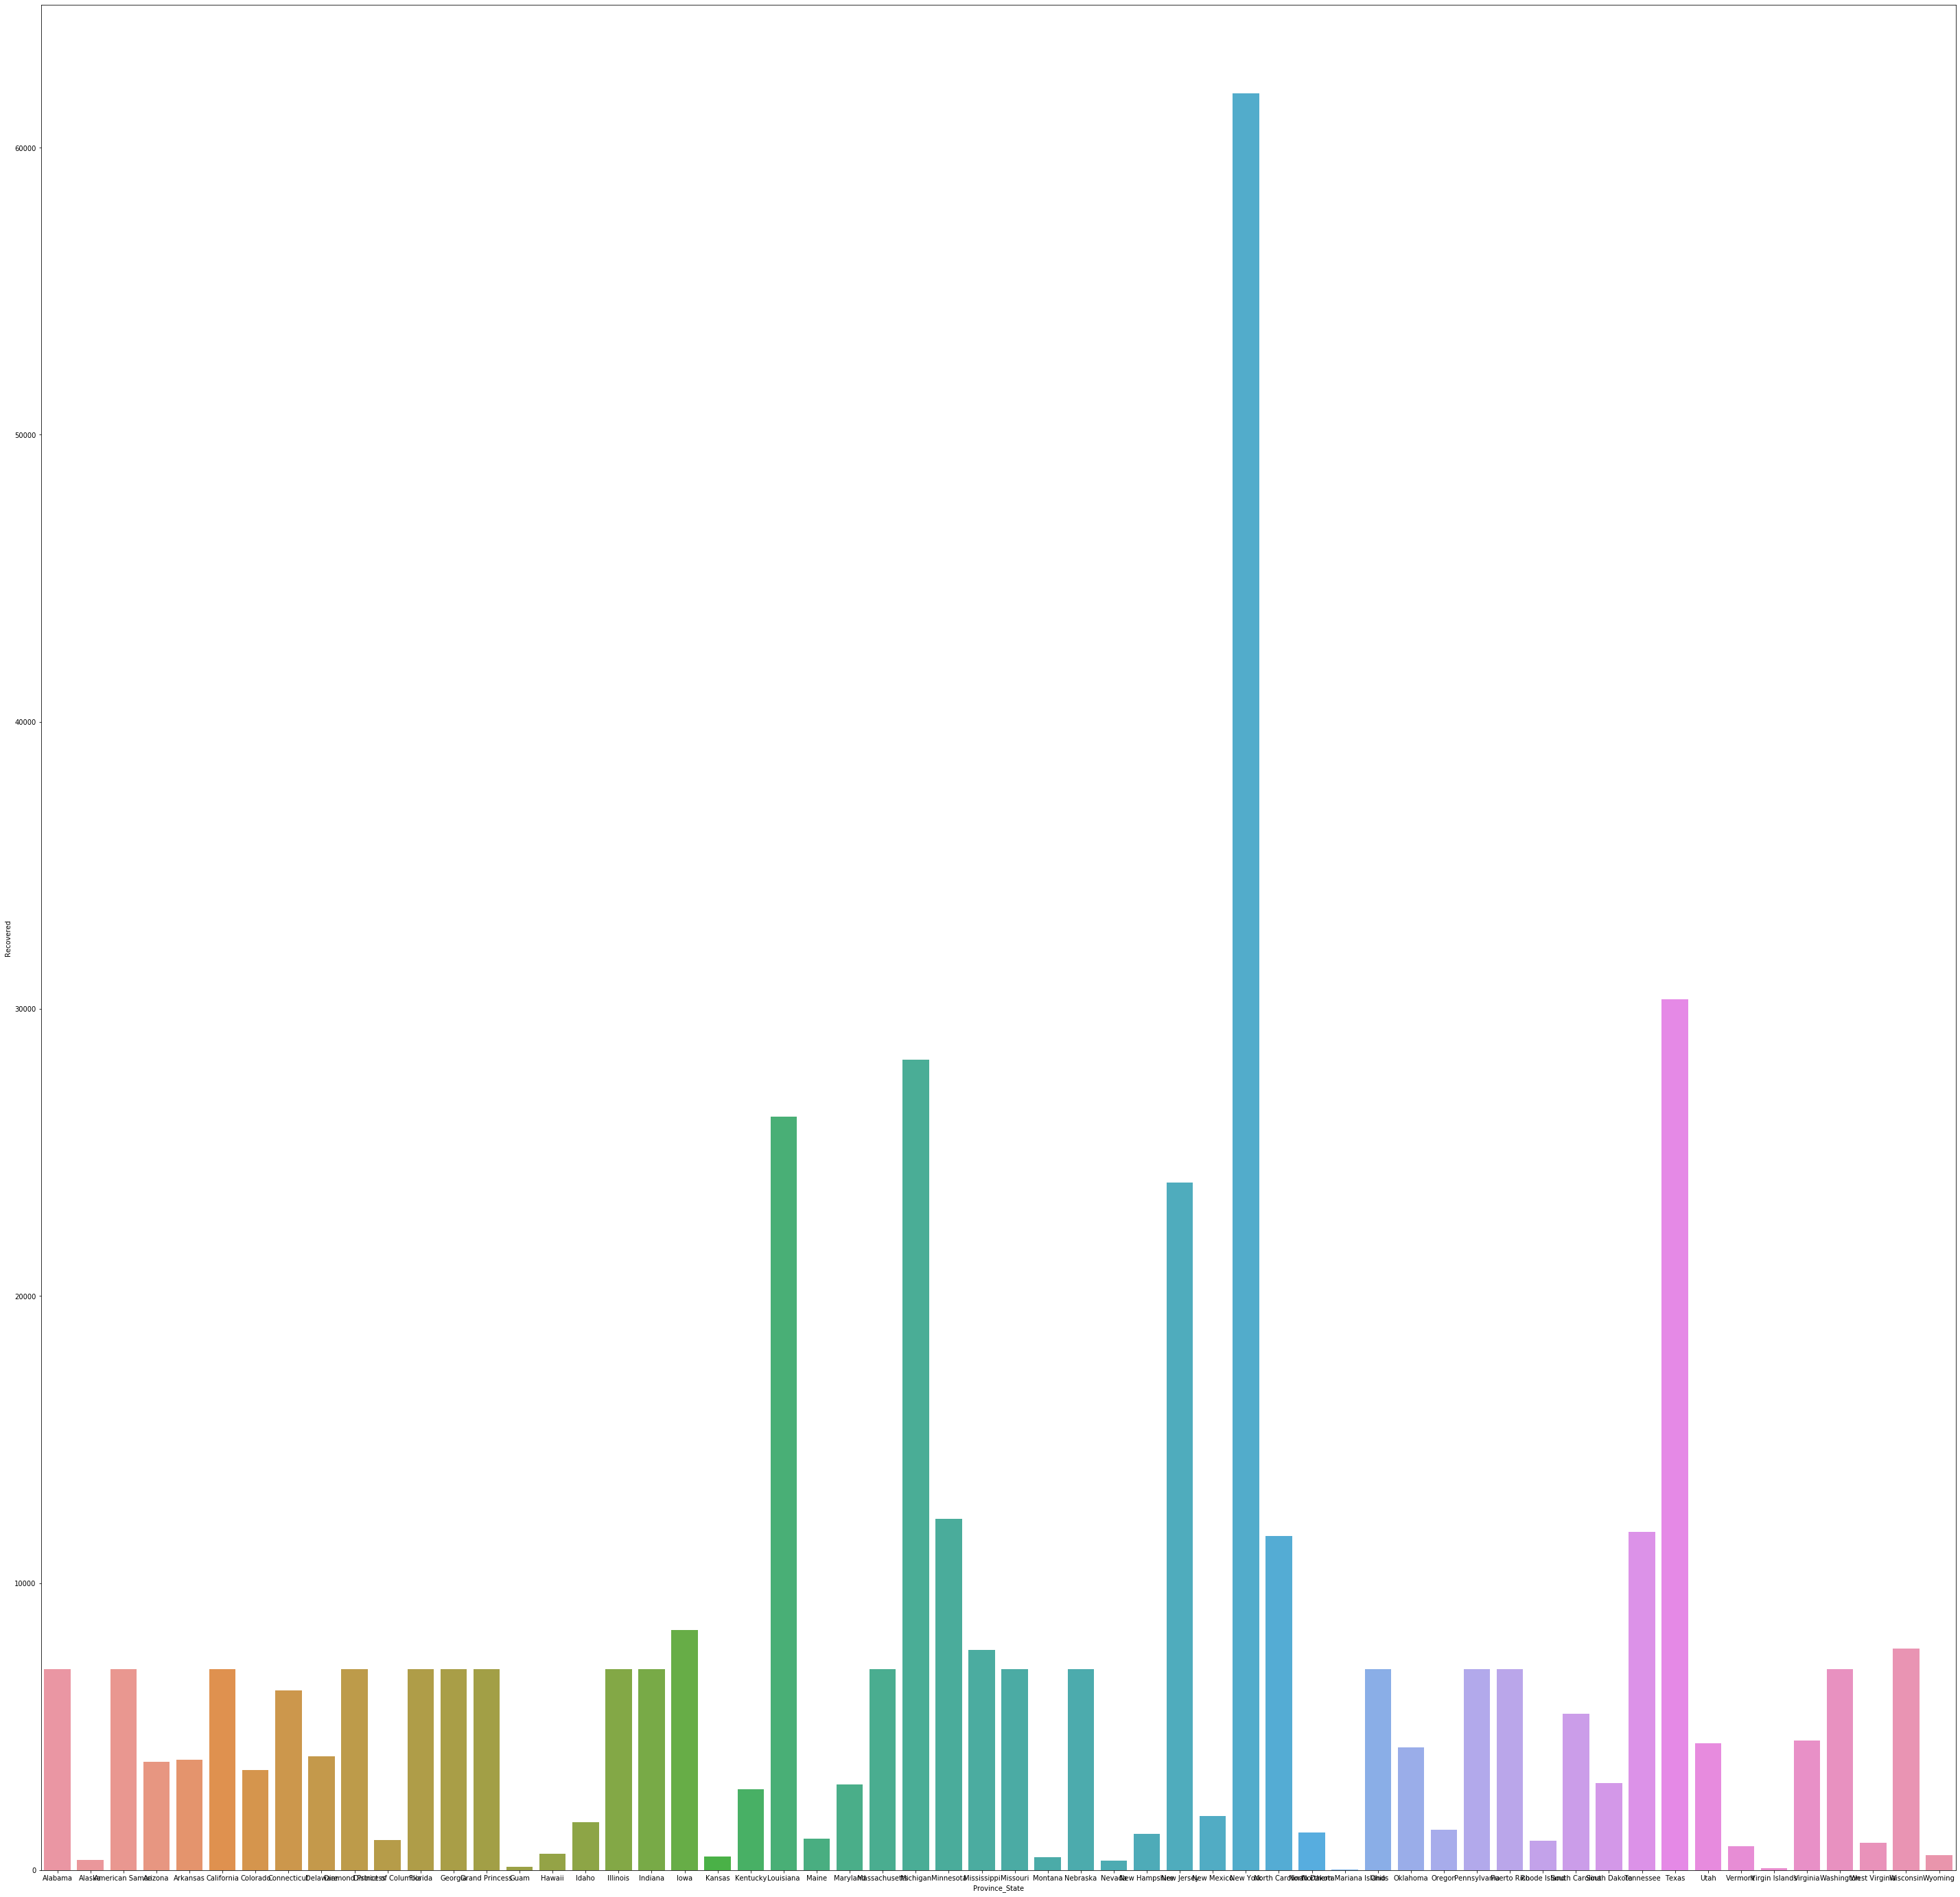

In [13]:
# Barplots
plt.figure(figsize=(50,50))
sns.barplot(x='Province_State',y='Recovered',data=covid_df)

As expected deaths are more for more densed cities/ big cities

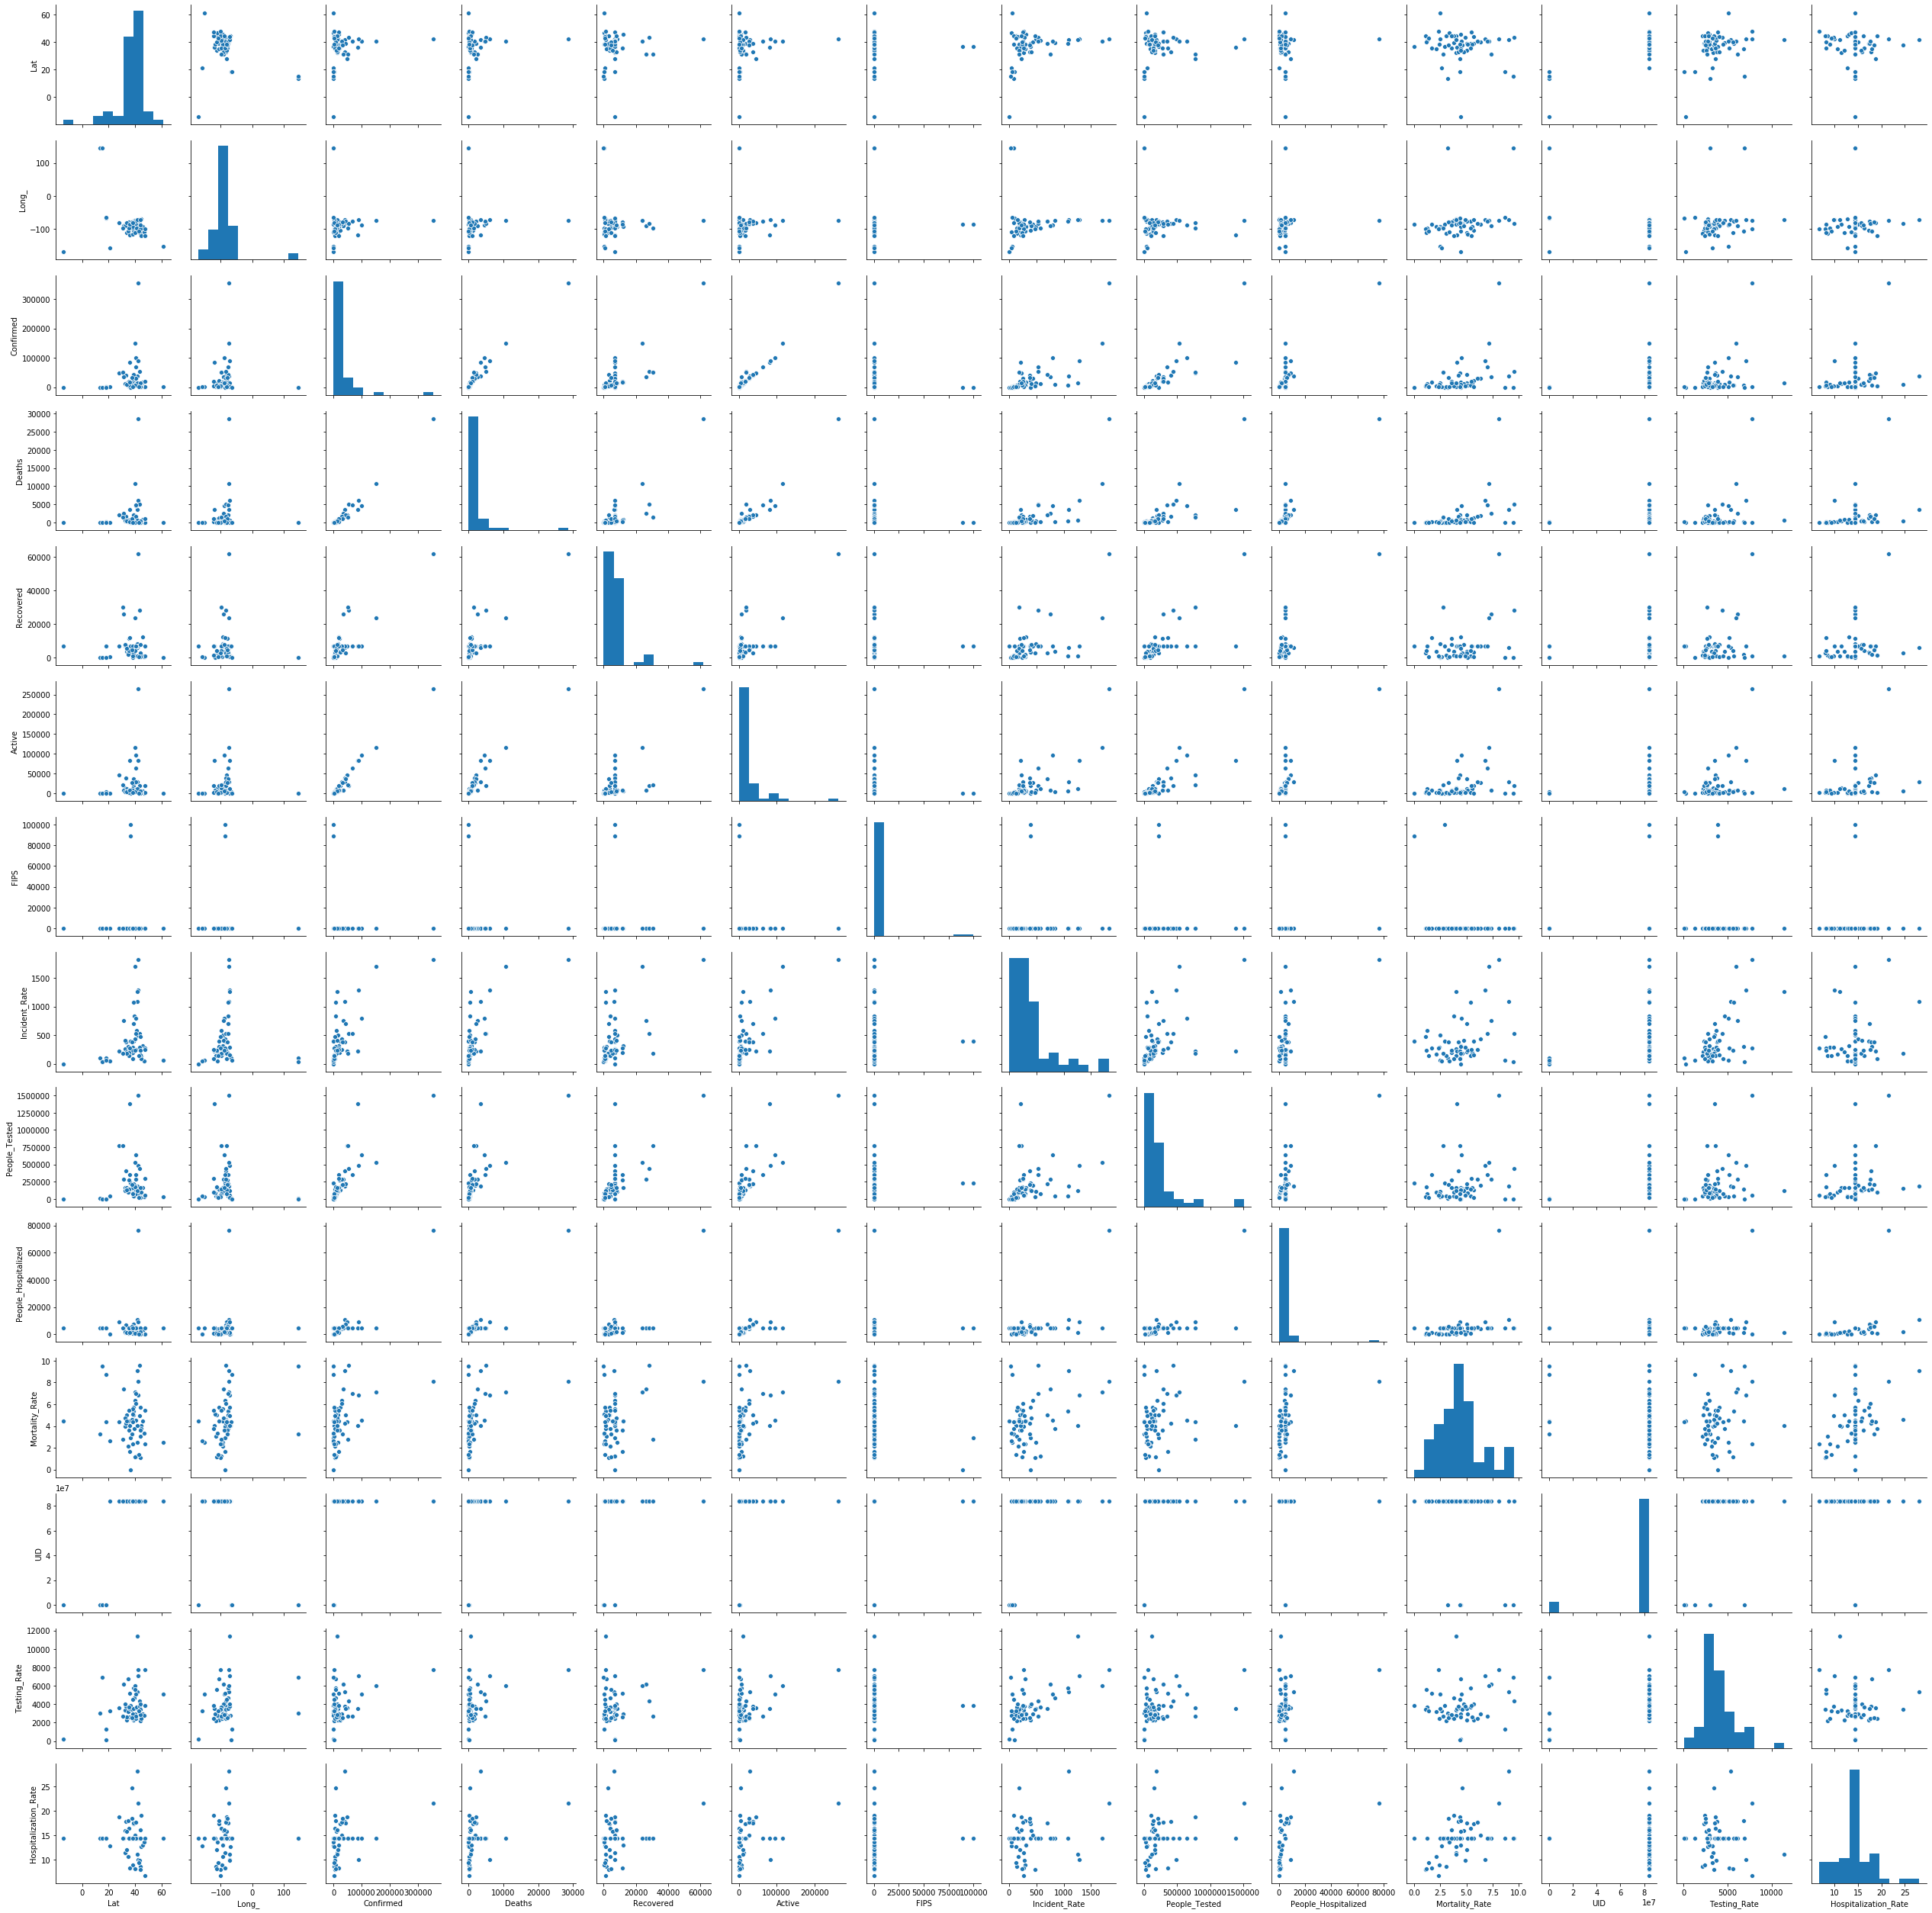

In [14]:
sns.pairplot(data=covid_df)

(14.0, 0.0)

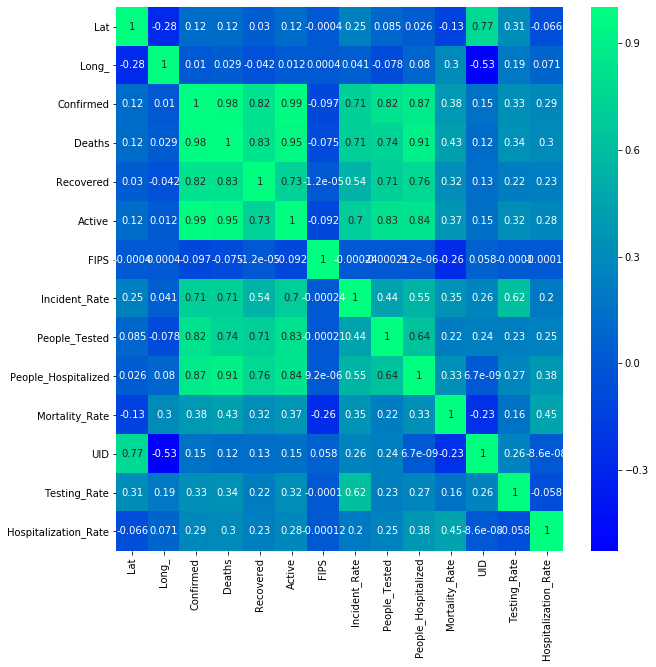

In [15]:
# Heat map of correlation matrix
corr_mat=covid_df.corr()
plt.figure(figsize=(10,10))
ax=sns.heatmap(corr_mat,annot=True,cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [16]:
# Converting categorical to numerical feature
from sklearn.preprocessing import LabelEncoder
covid_df['Province_State']=LabelEncoder().fit_transform(covid_df['Province_State'])
covid_df['ISO3']=LabelEncoder().fit_transform(covid_df['ISO3'])

In [17]:
covid_df['ISO3'].value_counts()

4    53
5     1
3     1
2     1
1     1
0     1
Name: ISO3, dtype: int64

# Feature Selection

In [19]:
cols2remove=['Lat','Long_','FIPS','UID','Province_State']
for col in cols2remove:
    covid_df.drop(col,inplace=True,axis=1)

In [20]:
covid_df.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,7007.428571,12530.0,266.194321,164450.0,1493.000000,3.999387,4,3353.942386,11.438860
1,401,10,352.000000,39.0,54.815493,37045.0,4897.454545,2.493766,4,5063.940017,14.342541
2,0,0,7007.428571,0.0,0.000000,124.0,4897.454545,4.458248,0,222.857246,14.342541
3,14906,747,3773.000000,10386.0,204.788838,165435.0,1792.000000,5.011405,4,2272.859351,12.022005
4,5003,107,3852.000000,1044.0,165.782801,96258.0,535.000000,2.138717,4,3189.670370,10.693584


## Model Selection to predict Deaths

In [21]:
# I will do normalization
Y=covid_df['Deaths']
X=covid_df.drop('Deaths',axis=1)

In [22]:
print(X.shape)
print(Y.shape)

(58, 10)
(58,)


In [23]:
colList=list(X.columns)
colList.remove('ISO3')
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
max_r2Score=0
active_r2s=0
iBest_rs=0
allalgo = [LinearRegression(),DecisionTreeRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for algo in allalgo:
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
        lm=algo
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        active_r2s=r2_score(pred,y_test)
        if active_r2s>max_r2Score:
            max_r2Score=active_r2s
            iBest_rs=iActive_rs
    print("Best r2 Score in algo {} is {} for random state {}.".format(algo,max_r2Score,iBest_rs))

Best r2 Score in algo LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.972492048499152 for random state 49.
Best r2 Score in algo DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is 0.978882459014094 for random state 54.
Best r2 Score in algo AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) is 0.978882459014094 for random state 54.
Best r2 Score in algo GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
             

Gradient Boost Algorithm is giving us the best result with 98% accuracy, let's use corss validation and later prepare our final model.

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingRegressor(),X,Y,cv=5,scoring="r2").mean()

0.3027001286389259

It's a low score, model is not suffering from over or under fitting.

In [30]:
# Max random state is coming around 60 and best model came out to be Gradient Boodting. We will create final model around that.
gbm=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=59,test_size=0.2)
gbm.fit(x_train,y_train)
pred=gbm.predict(x_test)

In [31]:
# Checking error and accuracy
print("r2_score is ",r2_score(pred,y_test))

r2_score is  0.9888940728240996


In [32]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbm,'GradBoost_Covid.pkl')

['GradBoost_Covid.pkl']

## Model Selection to predict Recovery

In [33]:
# I will do normalization
Y=covid_df['Recovered']
X=covid_df.drop('Recovered',axis=1)

In [34]:
# Normalization 
colList=list(X.columns)
colList.remove('ISO3')
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [35]:
max_r2Score=0
active_r2s=0
iBest_rs=0
allalgo = [LinearRegression(),DecisionTreeRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for algo in allalgo:
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
        lm=algo
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        active_r2s=r2_score(pred,y_test)
        if active_r2s>max_r2Score:
            max_r2Score=active_r2s
            iBest_rs=iActive_rs
    print("Best r2 Score in algo {} is {} for random state {}.".format(algo,max_r2Score,iBest_rs))

Best r2 Score in algo LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.980611434379201 for random state 77.
Best r2 Score in algo DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is 0.980611434379201 for random state 77.
Best r2 Score in algo AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) is 0.980611434379201 for random state 77.
Best r2 Score in algo GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
             

In [36]:
from sklearn.model_selection import GridSearchCV
DTC=DecisionTreeRegressor()
parameters = {"max_depth":[2,4,6,8,10]}
gs=GridSearchCV(DTC,parameters)
gs.fit(x_train,y_train)
gs.best_estimator_.get_params()

C:\Users\Sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

All Algorithms are giving us the best result with 98% accuracy,

Choosing Decision Tree algorithm

let's use cross validation and later prepare our final model.

In [37]:
cross_val_score(DecisionTreeRegressor(),X,Y,cv=5,scoring="r2").mean()
# It's a low score, model is not suffering from over or under fitting.

-12.244007130232895

In [38]:
dtm=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=77,test_size=0.2)
dtm.fit(x_train,y_train)
pred=dtm.predict(x_test)

In [39]:
print("r2_score is ",r2_score(pred,y_test))

r2_score is  -0.8899937962460838


In [40]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(dtm,'DecisionTree_Covid.pkl')

['DecisionTree_Covid.pkl']